In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [2]:
df = pd.read_excel('dataset.xlsx')

In [3]:
df = df[:3000]

In [4]:
df.label.value_counts()

label
0.0    2267
1.0     733
Name: count, dtype: int64

In [5]:
df.shape

(3000, 2)

In [6]:
df = df.sample(frac = 1)

In [7]:
df.head()

,text,label
145,It's anxious to worry,1.0
2795,The universe knows how hard I try to get you :),0.0
2993,Hah.. What's wrong,0.0
571,Sometimes feel anxious because tomorrow. .Tire...,1.0
1836,hi i just woke up,0.0


In [8]:
df.isnull().sum()

text     7
label    0
dtype: int64

In [9]:
df.dropna()

,text,label
145,It's anxious to worry,1.0
2795,The universe knows how hard I try to get you :),0.0
2993,Hah.. What's wrong,0.0
571,Sometimes feel anxious because tomorrow. .Tire...,1.0
1836,hi i just woke up,0.0
...,...,...
934,"new or not, is it really 1.71??? ️",0.0
985,can i ask for account tag q? thx bestie,0.0
1104,"AMIR : APPRECIATE AND AGREE, HAHAHAHA HAHAHAHA...",0.0
2895,"The risk of living in a small town, looking fo...",0.0


<Axes: ylabel='count'>

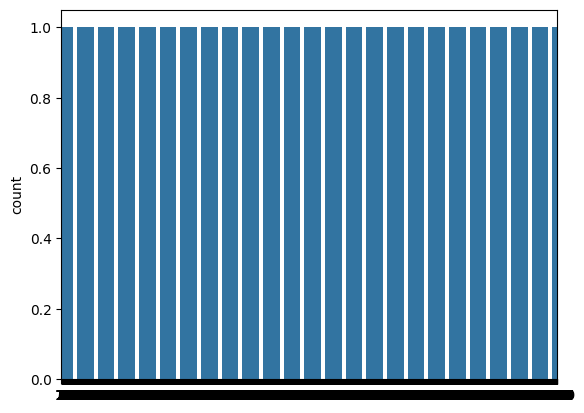

In [10]:
sns.countplot(df.label)

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
lm = WordNetLemmatizer()

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
def text_transformation(col):
    corpus = []
    for token in col:
        alphabet = re.sub('[^a-zA-Z]',' ',str(token))
        alphabet = alphabet.lower()
        alphabet = alphabet.split()
        a_lemmas = [lm.lemmatize(word) for word in alphabet if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in a_lemmas))
    return corpus

In [14]:
df['cleaned'] = text_transformation(df.text)

In [15]:
X = df.cleaned
y = df.label.astype(int)

In [16]:
vect = TfidfVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2),use_idf = True)

In [17]:
X_tfidf =vect.fit_transform(X).toarray()

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y,stratify = y,test_size = 0.2,random_state = 1)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier


lr_model = LogisticRegression(class_weight='balanced', max_iter=400)
dt_model = DecisionTreeClassifier(class_weight='balanced')
rf_model = RandomForestClassifier(class_weight='balanced')
mnb_model = MultinomialNB()
svm_model = SVC(class_weight='balanced')
knn_model = KNeighborsClassifier()
ada_model = AdaBoostClassifier()
model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes', 'SVM', 'KNN', 'AdaBoost']
ml_models = [lr_model,dt_model,rf_model,mnb_model, svm_model, knn_model, ada_model]

In [21]:
trained_ml_models = []
def model_train(model, train_data, train_labels):
    mf = model.fit(train_data,train_labels)
    trained_ml_models.append(mf)
# trained_ml_models = []
for i in ml_models:
    model_train(i,X_train, y_train)
#     trained_ml_models.append(tt)

d:\final prject\softwares\python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score


pr_list = []
re_list = []
f1_list = []

def print_results(md, x_test, y_test, name):
    #print("\n\nClassifier: ", name)
    pred_y = md.predict(x_test)
    true, pred = y_test, pred_y

    pr_list.append((round(precision_score(y_test, pred_y, average='weighted'),4)*100)) 
    re_list.append((round(recall_score(y_test, pred_y, average='weighted'),4)*100))
    f1_list.append((round(f1_score(y_test, pred_y, average='weighted'),4)*100))

for i in range(len(trained_ml_models)):
    md = trained_ml_models[i]
    name = model_names[i]
    print_results(md, X_test, y_test, name)

performance_matrix = pd.DataFrame({'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =model_names)

In [23]:
performance_matrix

,Precision,Recall,F1 Score
Logistic Regression,96.73,96.67,96.60
Decision Tree,98.16,98.17,98.16
Random Forest,97.83,97.83,97.82
Naive Bayes,88.55,86.50,84.49
SVM,92.93,92.33,91.84
KNN,82.86,77.83,70.10
AdaBoost,97.83,97.83,97.82


In [24]:
data_matrix = pd.DataFrame({
    'Model':model_names,'Precision':pr_list,
                        'Recall':re_list,
                        'F1 Score':f1_list,
                      },
                    )

In [25]:
data_matrix

,Model,Precision,Recall,F1 Score
0,Logistic Regression,96.73,96.67,96.60
1,Decision Tree,98.16,98.17,98.16
2,Random Forest,97.83,97.83,97.82
3,Naive Bayes,88.55,86.50,84.49
4,SVM,92.93,92.33,91.84
5,KNN,82.86,77.83,70.10
6,AdaBoost,97.83,97.83,97.82


C:\Users\saksh\AppData\Local\Temp\ipykernel_18904\3001276660.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(model_names, rotation=45);


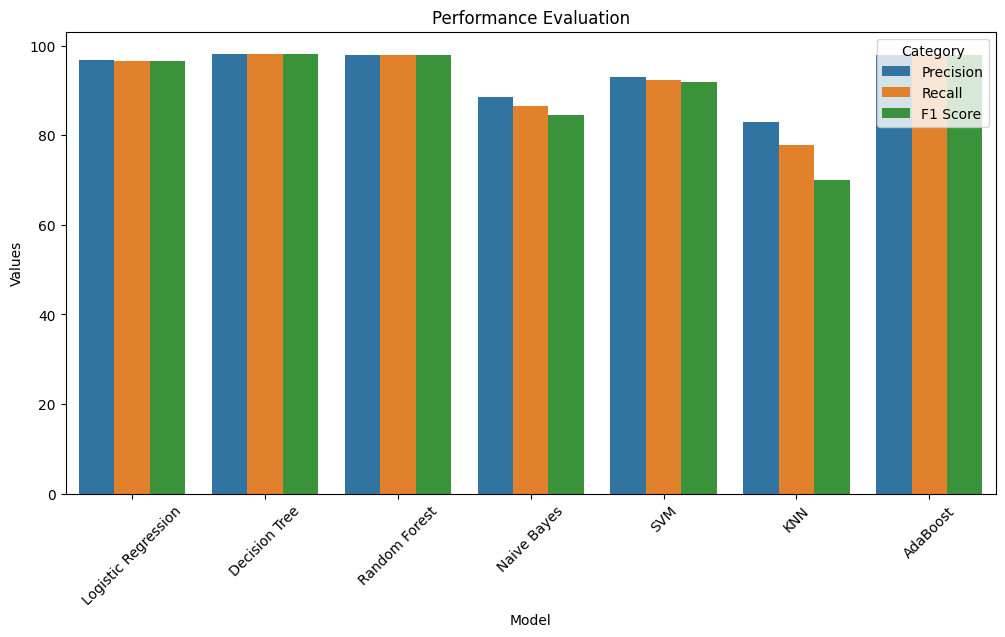

In [26]:
df_1 = pd.melt(data_matrix, id_vars="Model", var_name="Category", value_name="Values")
plt.figure(figsize=(12, 6))
ax = plt.subplot()

sns.barplot(data=df_1,x='Model', y='Values' ,hue='Category')
ax.set_xlabel('Model') 
ax.set_title('Performance Evaluation')

ax.xaxis.set_ticklabels(model_names, rotation=45);
plt.show()